In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [14]:
acs_data = pd.read_csv("Data/acs_5yr_est_selected_economic_characteristics_2010-2022.csv")
display(acs_data)

,Label (Grouping),Category,State,Estimate,Margin of Error,Percent,Percent Margin of Error,Year
0,EMPLOYMENT STATUS,Header,Alabama,NaN,NaN,NaN,NaN,2010
1,Population 16 years and over,EMPLOYMENT STATUS,Alabama,"3,714,504","±1,588","3,714,504",(X),2010
2,In labor force,EMPLOYMENT STATUS,Alabama,"2,246,848","±5,576",60.5%,±0.1,2010
3,Civilian labor force,EMPLOYMENT STATUS,Alabama,"2,230,879","±5,531",60.1%,±0.1,2010
4,Employed,EMPLOYMENT STATUS,Alabama,"2,036,867","±5,904",54.8%,±0.2,2010
...,...,...,...,...,...,...,...,...
98015,18 years and over,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,Puerto Rico,(X),(X),39.7%,±0.4,2021
98016,18 to 64 years,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,Puerto Rico,(X),(X),40.1%,±0.4,2021
98017,65 years and over,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,Puerto Rico,(X),(X),38.5%,±0.5,2021
98018,People in families,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,Puerto Rico,(X),(X),40.0%,±0.4,2021


In [15]:
obesity_data = pd.read_csv("Data/Nutrition_Physical_Activity_and_Obesity_Data.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_43536\754830990.py:1: DtypeWarning: Columns (18,19,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  obesity_data = pd.read_csv("Data/Nutrition_Physical_Activity_and_Obesity_Data.csv")


In [22]:
meat_slaughter_count = pd.read_csv("Data/Meat_Stats_Slaughter_Counts.csv")
display(meat_slaughter_count)
meat_slaughter_count['Date'] = pd.to_datetime(meat_slaughter_count['Date'])
meat_slaughter_count['Count']=meat_slaughter_count['Count'].str.replace(',','')
meat_slaughter_count['Count'] = meat_slaughter_count['Count'].astype(float)
meat_slaughter_count['Year'] = meat_slaughter_count['Year'].astype(int)
meat_slaughter_count.drop(meat_slaughter_count[meat_slaughter_count.Year<1985].index, inplace=True)
monthly_meat_slaughter_count=meat_slaughter_count.groupby(['Date','Commercial_Or_Federally_Inspected','Type_Of_Meat'], as_index=False)['Count'].sum()
display(meat_slaughter_count)

,Date,Year,Month,Unit,Animal,Count,Commercial_Or_Federally_Inspected,Type_Of_Meat
0,Dec-2023,2023,12,"1,000 Head",Cattle,"2,593.40",Commercial,Red Meat
1,Nov-2023,2023,11,"1,000 Head",Cattle,"2,729.90",Commercial,Red Meat
2,Oct-2023,2023,10,"1,000 Head",Cattle,"2,826.00",Commercial,Red Meat
3,Sep-2023,2023,9,"1,000 Head",Cattle,"2,610.60",Commercial,Red Meat
4,Aug-2023,2023,8,"1,000 Head",Cattle,"2,890.00",Commercial,Red Meat
...,...,...,...,...,...,...,...,...
15278,Apr-1983,1983,4,"1,000 Head",Turkeys,"10,563.00",Federally Inspected,Poultry
15279,Mar-1983,1983,3,"1,000 Head",Turkeys,"11,979.00",Federally Inspected,Poultry
15280,Feb-1983,1983,2,"1,000 Head",Turkeys,"8,477.00",Federally Inspected,Poultry
15281,Jan-1983,1983,1,"1,000 Head",Turkeys,"8,532.00",Federally Inspected,Poultry


C:\Users\user\AppData\Local\Temp\ipykernel_43536\1904658062.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  meat_slaughter_count['Date'] = pd.to_datetime(meat_slaughter_count['Date'])


,Date,Year,Month,Unit,Animal,Count,Commercial_Or_Federally_Inspected,Type_Of_Meat
0,2023-12-01,2023,12,"1,000 Head",Cattle,2593.4,Commercial,Red Meat
1,2023-11-01,2023,11,"1,000 Head",Cattle,2729.9,Commercial,Red Meat
2,2023-10-01,2023,10,"1,000 Head",Cattle,2826.0,Commercial,Red Meat
3,2023-09-01,2023,9,"1,000 Head",Cattle,2610.6,Commercial,Red Meat
4,2023-08-01,2023,8,"1,000 Head",Cattle,2890.0,Commercial,Red Meat
...,...,...,...,...,...,...,...,...
15253,1985-05-01,1985,5,"1,000 Head",Turkeys,13619.0,Federally Inspected,Poultry
15254,1985-04-01,1985,4,"1,000 Head",Turkeys,11168.0,Federally Inspected,Poultry
15255,1985-03-01,1985,3,"1,000 Head",Turkeys,11231.0,Federally Inspected,Poultry
15256,1985-02-01,1985,2,"1,000 Head",Turkeys,9167.0,Federally Inspected,Poultry


In [23]:
monthly_meat_slaughter_count.dropna(subset=['Count'], inplace=True)

fed_inspect_red_meat = monthly_meat_slaughter_count[(monthly_meat_slaughter_count['Commercial_Or_Federally_Inspected']=='Federally Inspected') & (monthly_meat_slaughter_count['Type_Of_Meat']=='Red Meat')]
fed_inspect_poultry = monthly_meat_slaughter_count[(monthly_meat_slaughter_count['Commercial_Or_Federally_Inspected']=='Federally Inspected') & (monthly_meat_slaughter_count['Type_Of_Meat']=='Poultry')]
commercial_red_meat = monthly_meat_slaughter_count[(monthly_meat_slaughter_count['Commercial_Or_Federally_Inspected']=='Commercial') & (monthly_meat_slaughter_count['Type_Of_Meat']=='Red Meat')]
commercial_poultry = monthly_meat_slaughter_count[(monthly_meat_slaughter_count['Commercial_Or_Federally_Inspected']=='Commercial') & (monthly_meat_slaughter_count['Type_Of_Meat']=='Poultry')]

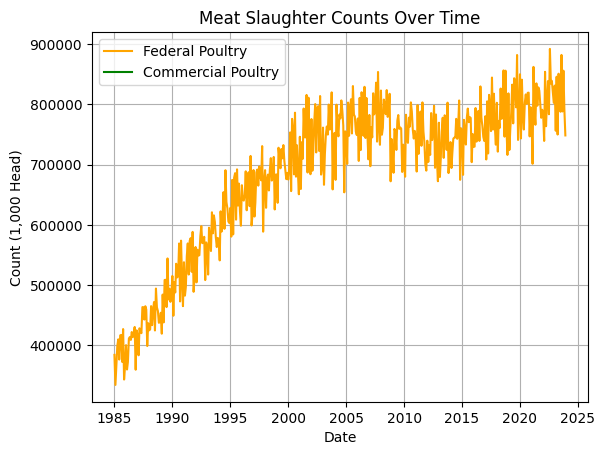

In [25]:


plt.plot(fed_inspect_poultry['Date'], fed_inspect_poultry['Count'], label='Federal Poultry', color = 'orange')
plt.plot(commercial_poultry['Date'], commercial_poultry['Count'], label='Commercial Poultry', color = 'green')

plt.title('Meat Slaughter Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Count (1,000 Head)')
plt.legend()
plt.grid(True)

plt.show()

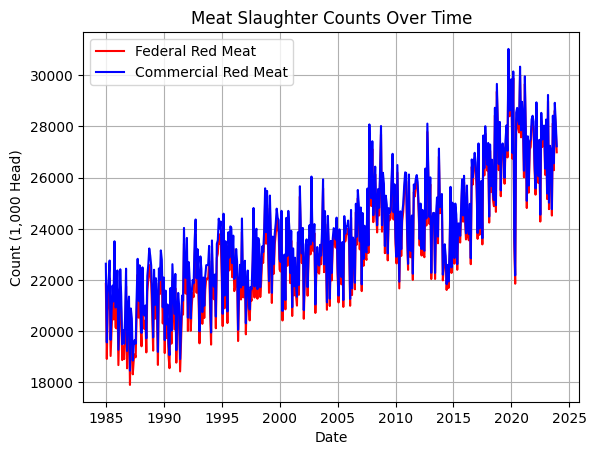

In [26]:
plt.plot(fed_inspect_red_meat['Date'], fed_inspect_red_meat['Count'], label='Federal Red Meat', color = 'red')
plt.plot(commercial_red_meat['Date'], commercial_red_meat['Count'], label='Commercial Red Meat', color = 'blue')

plt.title('Meat Slaughter Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Count (1,000 Head)')
plt.legend()
plt.grid(True)

plt.show()